In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [3]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

# The test directory doesn't have class subdirectories, so to make the
# generator work and match the expected output, we point to the parent
# directory `PATH` and specify `classes=['test']`. This treats the 'test'
# folder as a single class directory. `shuffle=False` is set to ensure
# the prediction order is correct.
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=PATH,
                                                         classes=['test'],
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode=None,
                                                         shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


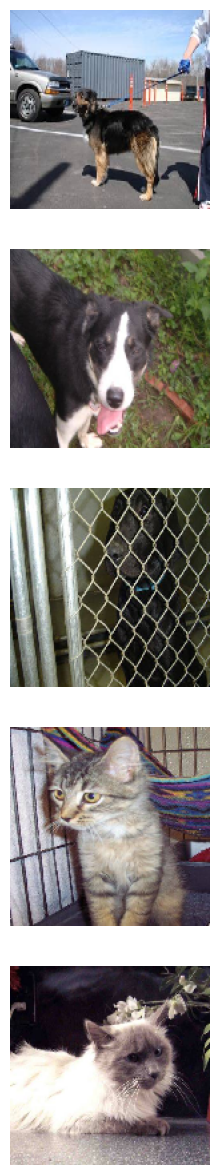

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [8]:
# 5
train_image_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


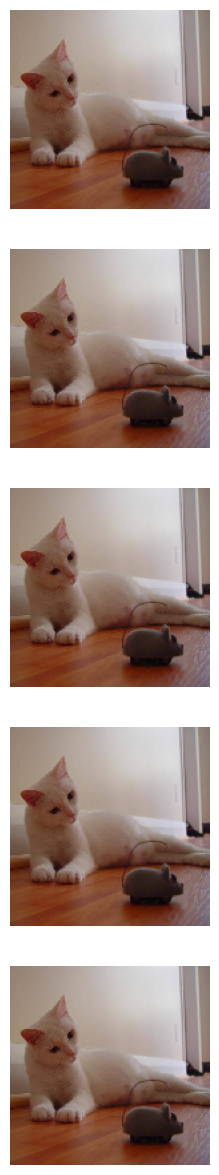

In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [9]:
# 7
model = Sequential([
    # First convolutional block
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    # Second convolutional block
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    # Third convolutional block
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    # Flatten the output for the fully connected layers
    Flatten(),
    # Fully connected hidden layer
    Dense(512, activation='relu'),
    # Dropout layer for regularization
    Dropout(0.2), # Adding dropout to prevent overfitting
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,641,441 (40.59 MB)

 Trainable params: 10,641,441 (40.59 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# @title Default title text
# 8
import math

# Recalculate steps per epoch and validation steps to ensure all samples are covered
# Using math.ceil to round up, ensuring no partial batches are missed
steps_per_epoch = math.ceil(total_train / batch_size)
validation_steps = math.ceil(total_val / batch_size)

print(f"Calculated steps_per_epoch: {steps_per_epoch}")
print(f"Calculated validation_steps: {validation_steps}")

history = model.fit(
    x=train_data_gen,
    steps_per_epoch=steps_per_epoch, # Use the recalculated value
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=validation_steps # Use the recalculated value
)

Calculated steps_per_epoch: 16
Calculated validation_steps: 8
Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.8786 - loss: 0.3065 - val_accuracy: 0.7010 - val_loss: 0.6524
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.8724 - loss: 0.3078 - val_accuracy: 0.7330 - val_loss: 0.6359
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.8957 - loss: 0.2316 - val_accuracy: 0.7320 - val_loss: 0.6668
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9320 - loss: 0.1766 - val_accuracy: 0.7250 - val_loss: 0.6874
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.9556 - loss: 0.1505 - val_accuracy: 0.7200 - val_loss: 0.8239
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9658 - loss: 0.1192 - val_accuracy: 0.7110 - val_loss: 0.8417
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9746 - loss: 0.1021 - val_accuracy: 0.7150 - val_loss: 1.0000
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accu

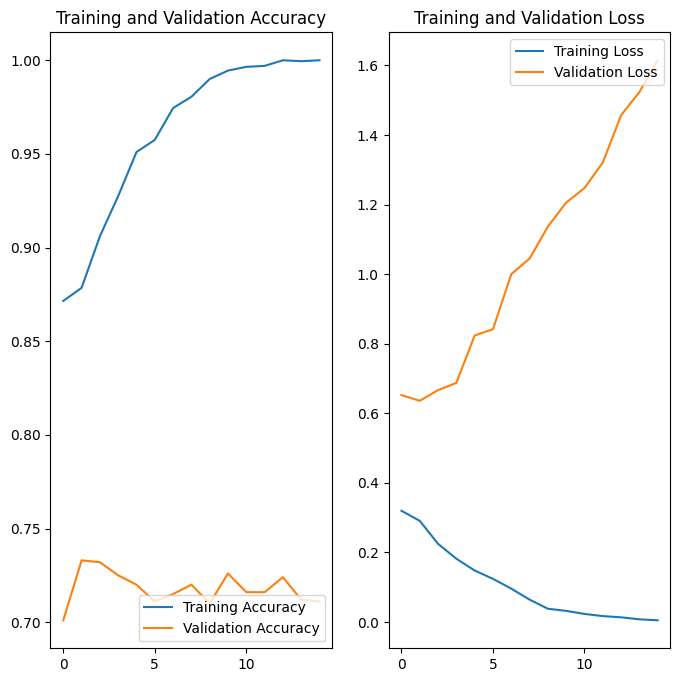

In [16]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


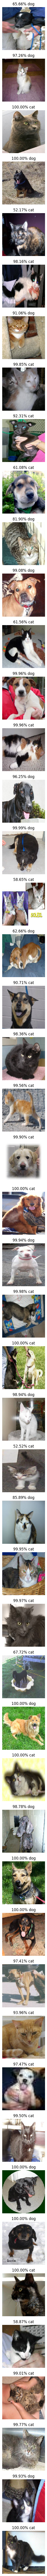

In [18]:
# 10
# Get predictions for the test set.
# test_data_gen is configured with shuffle=False, ensuring the order of images is preserved.
# Since total_test (50) is less than batch_size (128), all test images will be in one batch.
predictions = model.predict(test_data_gen)

# Flatten the predictions to a 1D array of raw probabilities (float values between 0 and 1).
# These are the values expected by both the plotImages function (for percentage display)
# and the scoring logic in Cell 11's 'round(probability)' check.
probabilities = predictions.flatten()

# Get the actual test images from the test_data_gen.
# test_data_gen will yield one batch containing all 50 images.
# We only need the images for plotting.
test_images = next(test_data_gen) # Only one item is returned since class_mode=None

# Call the plotImages function to visualize the results.
# This function is expected to be provided by the challenge environment.
# It will use the 'probabilities' (float values) to display percentages of certainty.
plotImages(test_images, probabilities)

In [19]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
